<a href="https://colab.research.google.com/github/elena-andreini/TriesteItalyChapter_PlasticDebrisDetection/blob/main/task3-cleaning-and-preprocessing/Mados_Prepration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install -q rasterio folium geopandas shapely plotly kagglehub #necessary imports, some not present in colab

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import rasterio
from rasterio.plot import show
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import glob
import cv2
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import kagglehub
import zipfile
import shutil
from datetime import datetime
import re

Driver Connection

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive

MyDrive


Download Mados Data from Driver

###Mados Data

In [8]:
import zipfile
import os

# Path to the ZIP file
zip_path ="/content/drive/MyDrive/MADOS.zip"

# Directory to extract the files
extract_path = "/content"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content


In [9]:
print("Dataset downloaded to:", extract_path)
print("Contents of the path:", os.listdir(extract_path))

Dataset downloaded to: /content
Contents of the path: ['.config', 'drive', 'MADOS', 'sample_data']


In [10]:
import os

def get_folder_size_gb(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            total_size += os.path.getsize(file_path)

    # Convert bytes to gigabytes (1 GB = 1024 * 1024 * 1024 bytes)
    size_gb = total_size / (1024 ** 3)
    return size_gb

# Example usage:
folder_path = '/content/MADOS'
size_gb = get_folder_size_gb(folder_path)
print(f"Size of folder '{folder_path}': {size_gb:.2f} GB")

Size of folder '/content/MADOS': 5.36 GB


In [11]:
mados_path = "/content/MADOS/splits"
print("Contents of MADOS directory:", os.listdir(mados_path))



Contents of MADOS directory: ['val_X.txt', 'test_X.txt', 'train_X.txt']


In [12]:
import os

extract_path = "/content/MADOS"  # Replace with the actual path
print("Contents of the extracted directory:")
print(os.listdir(extract_path))

Contents of the extracted directory:
['Scene_2', 'Scene_162', 'Scene_7', 'Scene_8', 'Scene_64', 'Scene_154', 'Scene_40', 'Scene_170', 'Scene_164', 'Scene_9', 'Scene_114', 'Scene_52', 'Scene_11', 'Scene_96', 'Scene_74', 'Scene_129', 'Scene_68', 'Scene_148', 'Scene_152', 'Scene_4', 'Scene_34', 'Scene_169', 'Scene_102', 'Scene_108', 'Scene_141', 'Scene_75', 'Scene_31', 'Scene_71', 'Scene_49', 'Scene_19', 'Scene_113', 'Scene_90', 'Scene_58', 'Scene_43', 'Scene_147', 'Scene_100', 'Scene_99', 'Scene_107', 'Scene_48', 'Scene_24', 'Scene_105', 'Scene_28', 'Scene_171', 'Scene_72', 'splits', 'Scene_81', 'Scene_138', 'Scene_56', 'Scene_146', 'Scene_130', 'Scene_115', 'Scene_172', 'Scene_155', 'Scene_16', 'Scene_32', 'Scene_153', 'Scene_39', 'Scene_22', 'Scene_118', 'Scene_10', 'Scene_33', 'Scene_14', 'Scene_149', 'Scene_167', 'Scene_124', 'Scene_161', 'Scene_67', 'Scene_59', 'Scene_0', 'Scene_77', 'Scene_132', 'Scene_112', 'Scene_61', 'Scene_54', 'Scene_136', 'Scene_13', 'Scene_116', 'Scene_3', '

In [13]:
# Set up the environment
import warnings
warnings.filterwarnings('ignore')

Delete DataBase

In [61]:
#import shutil

dataset_path = "/content/merged_marida_mados " # Adjust if needed

if os.path.exists("/content/merged_marida_mados"):
    shutil.rmtree("/content/merged_marida_mados")

    print("MADOS dataset deleted successfully.")
else:
    print("Dataset not found, nothing to delete.")


MADOS dataset deleted successfully.


Download Marida Database

In [15]:
import zipfile
import os

# Path to the ZIP file
zip_path1 ="/content/drive/MyDrive/MARIDA.zip"

# Directory to extract the files
extract_path1 = "/content/marida_data"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path1)

print(f"Files extracted to: {extract_path1}")

Files extracted to: /content/marida_data


In [16]:
print("Dataset downloaded to:", extract_path1)
print("Contents of the path:", os.listdir(extract_path1))


Dataset downloaded to: /content/marida_data
Contents of the path: ['labels_mapping.txt', 'splits', 'patches', 'shapefiles']


To Visualize images and content

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique values: [0.16726452 0.1886762  0.25073877 ... 2.3032045  2.3139286  2.358803  ]
Min/Max: 0.16726452 2.358803


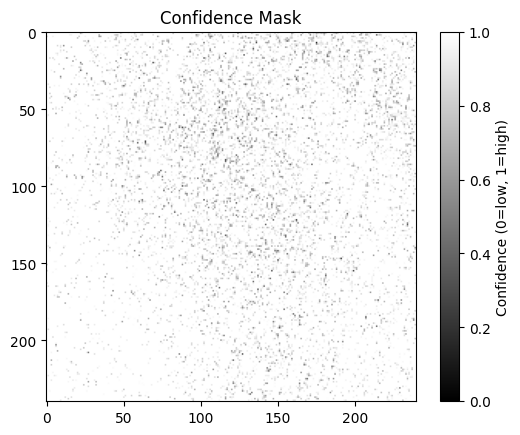

In [17]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file
file_path = "/content/MADOS/Scene_104/10/Scene_104_L2W_TUR_Nechad2016_665_9.tif"
with rasterio.open(file_path) as src:
    conf_data = src.read(1)  # Read the first band
    print("Metadata:", src.meta)  # Check dtype, shape, etc.
    print("Unique values:", np.unique(conf_data))
    print("Min/Max:", np.min(conf_data), np.max(conf_data))

    # Visualize
    plt.imshow(conf_data, cmap='gray', vmin=0, vmax=1)
    plt.colorbar(label='Confidence (0=low, 1=high)')
    plt.title("Confidence Mask")
    plt.show()

In [18]:
import rasterio

with rasterio.open('/content/MADOS/Scene_0/10/Scene_0_L2R_cl_9.tif') as src:
        num_bands = src.count
        print("Number of bands:", num_bands)

Number of bands: 1


In [19]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Open the classification label file
cl_file = "/content/MADOS/Scene_0/10/Scene_0_L2R_cl_1.tif"
with rasterio.open(cl_file) as src:
    cl_data = src.read(1)
    print("Label metadata:", src.meta)
    print("Unique label values:", np.unique(cl_data))

Label metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique label values: [0 6]


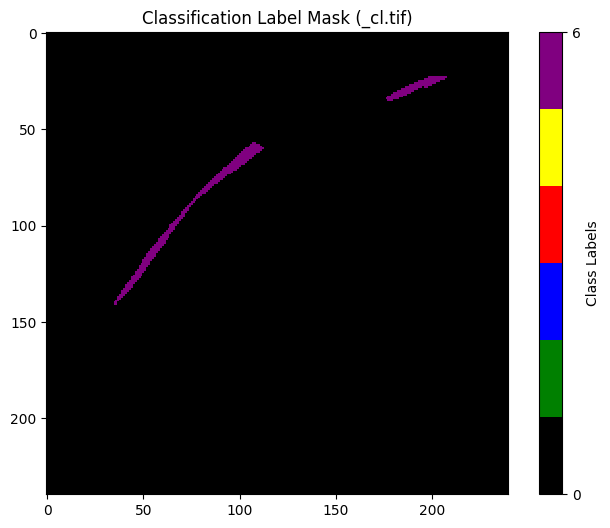

In [20]:
# Create a color map for visualization (adjust colors to match your classes)
from matplotlib.colors import ListedColormap
class_colors = ['black', 'green', 'blue', 'red', 'yellow', 'purple']  # Example for 6 classes
cmap = ListedColormap(class_colors)

plt.figure(figsize=(8, 6))
plt.imshow(cl_data, cmap=cmap, interpolation='none')
plt.colorbar(ticks=np.unique(cl_data), label='Class Labels')
plt.title("Classification Label Mask (_cl.tif)")
plt.show()

In [21]:
import rasterio
conf_data = rasterio.open("/content/MADOS/Scene_0/10/Scene_0_L2R_cl_1.tif").read(1)  # Reads the first band
print(conf_data[10, 20])  # Prints confidence at pixel (10, 20), e.g., `0.7`

0


In [22]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm

# Base directory
base_dir = Path("/content/MADOS")
output_dir = Path("/content/extracted_data_Mados")

# Create main output subfolders
(output_dir / "images").mkdir(parents=True, exist_ok=True)
(output_dir / "conf").mkdir(parents=True, exist_ok=True)
(output_dir / "cl").mkdir(parents=True, exist_ok=True)

def process_scene(scene_path):
    """Copy files to organized subfolders without renaming"""
    for file_path in scene_path.glob("*"):
        # Handle both .png and .tif RGB files
        if "_rgb_" in file_path.name.lower() and file_path.suffix.lower() in ('.png', '.tif'):
            shutil.copy2(file_path, output_dir / "images" / file_path.name)
        elif "_conf_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "conf" / file_path.name)
        elif "_cl_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "cl" / file_path.name)

# Process all scenes from 0 to 173
for scene_num in tqdm(range(174), desc="Processing Scenes"):
    scene_path = base_dir / f"Scene_{scene_num}"

    if scene_path.exists():
        # Process each subdirectory (10, 20, etc.) within the scene
        for subdir in scene_path.glob("*/"):
            if subdir.is_dir():
                process_scene(subdir)
    else:
        print(f"Scene {scene_num} not found, skipping...")

print("\nExtraction complete!")
print(f"Files organized in:\n{output_dir}/")
print("├── images/  (All *_rgb_*.png and *_rgb_*.tif files)")
print("├── conf/    (All *_conf_*.tif files)")
print("└── cl/      (All *_cl_*.tif files)")

Processing Scenes: 100%|██████████| 174/174 [00:18<00:00,  9.32it/s]


Extraction complete!
Files organized in:
/content/extracted_data_Mados/
├── images/  (All *_rgb_*.png and *_rgb_*.tif files)
├── conf/    (All *_conf_*.tif files)
└── cl/      (All *_cl_*.tif files)


In [23]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm

# Base directories
base_dir = Path("/content/marida_data")
patches_dir = base_dir / "patches"  # Note: Changed from 'patches' to 'patches'
output_dir = Path("/content/extracted_data_Marida")

# Create output folders
(output_dir / "images").mkdir(parents=True, exist_ok=True)
(output_dir / "conf").mkdir(parents=True, exist_ok=True)
(output_dir / "cl").mkdir(parents=True, exist_ok=True)

def classify_and_copy(file_path):
    """Strict classification and copying of files"""
    filename = file_path.name.lower()

    # Confidence maps (must contain '_conf')
    if '_conf' in filename:
        dest = output_dir / "conf"
        shutil.copy2(file_path, dest / file_path.name)
        return "conf"

    # CL maps (must contain '_cl')
    elif '_cl' in filename:
        dest = output_dir / "cl"
        shutil.copy2(file_path, dest / file_path.name)
        return "cl"

    # All other files go to images
    else:
        dest = output_dir / "images"
        shutil.copy2(file_path, dest / file_path.name)
        return "image"

# Process each patch subfolder
patch_subfolders = [d for d in patches_dir.iterdir() if d.is_dir()]
print(f"Found {len(patch_subfolders)} patch subfolders")

classification_counts = {"image": 0, "conf": 0, "cl": 0}

for patch_folder in tqdm(patch_subfolders, desc="Processing patches"):
    for file_path in patch_folder.glob("*"):
        if file_path.is_file():
            result = classify_and_copy(file_path)
            classification_counts[result] += 1

# Verification
print("\nFinal Classification:")
print(f"Images:      {classification_counts['image']} files")
print(f"Confidence:  {classification_counts['conf']} files")
print(f"CL maps:     {classification_counts['cl']} files")

# Show 3 samples from each folder
def show_samples(folder, count=3):
    files = list((output_dir / folder).glob("*"))
    print(f"\nSample {folder} files:")
    for f in files[:count]:
        print(f" - {f.name}")

show_samples("images")
show_samples("conf")
show_samples("cl")

Found 63 patch subfolders


Processing patches: 100%|██████████| 63/63 [00:45<00:00,  1.38it/s]


Final Classification:
Images:      1381 files
Confidence:  1381 files
CL maps:     1381 files

Sample images files:
 - S2_18-9-20_16PDC_10.tif
 - S2_9-10-17_16PEC_4.tif
 - S2_12-1-19_16PEC_52.tif

Sample conf files:
 - S2_8-3-18_16PEC_0_conf.tif
 - S2_15-11-20_16PCC_6_conf.tif
 - S2_19-9-18_16PDC_16_conf.tif

Sample cl files:
 - S2_9-10-17_16PEC_19_cl.tif
 - S2_16-2-18_16PEC_0_cl.tif
 - S2_24-10-18_16PDC_21_cl.tif


Now we will explora how many images contain debris in marida and mados .

Mados

In [24]:
import rasterio
import numpy as np
import os

# Define path to the directory containing the files
input_dir = "/content/extracted_data_Mados/cl"

# Define the class number for marine debris (assuming class 1 represents marine debris)
marine_debris_class = 1

# Initialize counter for images with marine debris
images_with_debris = 0

# Function to read and process a single file
def process_scene(file_path):
    global images_with_debris

    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band (assuming it's the class layer)

        # Count the number of marine debris pixels (class number 1)
        marine_debris_pixels = np.sum(image == marine_debris_class)

        # Only print and count if marine debris is detected
        if marine_debris_pixels > 0:
            images_with_debris += 1
           # print(f"{os.path.basename(file_path)}: {marine_debris_pixels} marine debris pixels")

# Process all files in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(input_dir, file_name)
        process_scene(file_path)

# Print total count of images with debris
print(f"\nTotal images with marine debris detected: {images_with_debris}")



Total images with marine debris detected: 472


Input: /content/MADOS

Scene_0/10

Scene_0/20

Scene_0/60

... up to Scene_173

Output:

/content/mados_resized_bilinear/ → All crops resized to 256×256 using bilinear interpolation

/content/mados_resized_padding/ → All crops resized to 256×256 using zero padding

/content/mados_stacked_bilinear/ → 11 bands stacked after bilinear resized

/content/mados_stacked_padding/ → 11 bands stacked after zero padded

Marida

In [25]:
import rasterio
import numpy as np
import os

# Define path to the directory containing the files
input_dir = "/content/extracted_data_Marida/cl"

# Define the class number for marine debris (assuming class 1 represents marine debris)
marine_debris_class = 1

# Initialize counter for images with marine debris
images_with_debris = 0

# Function to read and process a single file
def process_scene(file_path):
    global images_with_debris

    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band (assuming it's the class layer)

        # Count the number of marine debris pixels (class number 1)
        marine_debris_pixels = np.sum(image == marine_debris_class)

        # Only print and count if marine debris is detected
        if marine_debris_pixels > 0:
            images_with_debris += 1
           # print(f"{os.path.basename(file_path)}: {marine_debris_pixels} marine debris pixels")

# Process all files in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(input_dir, file_name)
        process_scene(file_path)

# Print total count of images with debris
print(f"\nTotal images with marine debris detected: {images_with_debris}")


Total images with marine debris detected: 373


In [27]:
# Install needed libraries if not installed
!pip install mlflow albumentations rasterio opencv-python

import os
import glob
import numpy as np
import cv2
import rasterio
import mlflow
from rasterio.enums import Resampling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00


In [28]:
# Set experiment name
mlflow.set_experiment("MADOS_MARIDA_Preprocessing")


2025/04/19 19:06:55 INFO mlflow.tracking.fluent: Experiment with name 'MADOS_MARIDA_Preprocessing' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/826749822164499006', creation_time=1745089615308, experiment_id='826749822164499006', last_update_time=1745089615308, lifecycle_stage='active', name='MADOS_MARIDA_Preprocessing', tags={}>

In [29]:
# Set paths
MARIDA_PATH = '/content/marida_data'
MADOS_PATH = '/content/MADOS'

# Create output folders
os.makedirs('/content/processed_MADOS_padding', exist_ok=True)


1-Extract_Marine_Debrise

In [30]:
import os
import shutil
import rasterio
import numpy as np
from glob import glob

# Input MADOS path
MADOS_PATH = '/content/MADOS'

# Output path for extracted marine debris scenes
OUTPUT_PATH = '/content/extracted_marine_debris'

# Create output folder
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Define marine debris class
marine_debris_class = 1

# List all scenes
scene_paths = sorted(glob(os.path.join(MADOS_PATH, 'Scene_*')))

for scene_path in scene_paths:
    scene_id = os.path.basename(scene_path)
    found_marine_debris = False

    for resolution in ['10', '20', '60']:
        resolution_path = os.path.join(scene_path, resolution)
        if not os.path.exists(resolution_path):
            continue

        # Find classification (cl) files
        cl_files = glob(os.path.join(resolution_path, '*_cl_*.tif'))

        for cl_file in cl_files:
            with rasterio.open(cl_file) as src:
                cl_array = src.read(1)

            if marine_debris_class in np.unique(cl_array):
                found_marine_debris = True
                break  # Found in this scene, no need to check more

        if found_marine_debris:
            break  # Found in this scene, no need to check more

    # If marine debris found, copy all 10, 20, 60 folders
    if found_marine_debris:
        for resolution in ['10', '20', '60']:
            source_path = os.path.join(scene_path, resolution)
            if os.path.exists(source_path):
                dest_path = os.path.join(OUTPUT_PATH, scene_id, resolution)
                os.makedirs(dest_path, exist_ok=True)

                for file_name in os.listdir(source_path):
                    source_file = os.path.join(source_path, file_name)
                    dest_file = os.path.join(dest_path, file_name)
                    shutil.copy2(source_file, dest_file)

print("Extraction complete.")


Extraction complete.


2-Resize

In [31]:
import os
import rasterio
from rasterio.enums import Resampling
from glob import glob

# Paths
EXTRACTED_PATH = '/content/extracted_marine_debris'
RESIZED_PATH = '/content/step2_resize_mados_debris'
os.makedirs(RESIZED_PATH, exist_ok=True)

# Target size
TARGET_SIZE = (256, 256)

# Function to resize and save
def resize_and_save(input_path, output_path, resampling_method):
    with rasterio.open(input_path) as src:
        data = src.read(
            out_shape=(src.count, TARGET_SIZE[0], TARGET_SIZE[1]),
            resampling=resampling_method
        )
        profile = src.profile
        profile.update({
            'height': TARGET_SIZE[0],
            'width': TARGET_SIZE[1],
            'transform': rasterio.transform.from_origin(
                src.bounds.left,
                src.bounds.top,
                (src.bounds.right - src.bounds.left) / TARGET_SIZE[1],
                (src.bounds.bottom - src.bounds.top) / TARGET_SIZE[0]
            )
        })

        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(data)

# Process each scene
scene_paths = sorted(glob(os.path.join(EXTRACTED_PATH, 'Scene_*')))

for scene_path in scene_paths:
    scene_id = os.path.basename(scene_path)

    for res in ['10', '20', '60']:
        res_input_path = os.path.join(scene_path, res)
        if not os.path.exists(res_input_path):
            continue

        res_output_path = os.path.join(RESIZED_PATH, scene_id, res)
        os.makedirs(res_output_path, exist_ok=True)

        # Process each file inside resolution folder
        tif_files = sorted(glob(os.path.join(res_input_path, '*.tif')))

        for tif_file in tif_files:
            filename = os.path.basename(tif_file)
            if 'cl' in filename or 'conf' in filename:
                resampling_method = Resampling.nearest
            else:
                resampling_method = Resampling.bilinear

            output_file_path = os.path.join(res_output_path, filename)

            resize_and_save(tif_file, output_file_path, resampling_method)

print("Finished resizing all files into step2_resize_mados_debris with original names.")


Finished resizing all files into step2_resize_mados_debris with original names.


3-Stuck Bands

In [54]:
import os
import numpy as np
from PIL import Image

def save_tif(image_array, save_path):
    # Ensure the image is in uint16 format and within the valid range
    image_array = np.clip(image_array, 0, 65535).astype(np.uint16)

    # Convert to image and save
    image = Image.fromarray(image_array[0])  # This works if the image is only single channel
    image.save(save_path, format='TIFF')

# Paths
input_root = '/content/step2_resize_mados_debris'
output_root = '/content/step3_ready_mados_debris'

os.makedirs(output_root, exist_ok=True)

# Iterate scenes
for scene_name in sorted(os.listdir(input_root)):
    scene_path = os.path.join(input_root, scene_name)
    if not os.path.isdir(scene_path):
        continue

    print(f"Processing {scene_name}...")

    # Prepare paths
    res10_path = os.path.join(scene_path, '10')
    res20_path = os.path.join(scene_path, '20')
    res60_path = os.path.join(scene_path, '60')

    # Collect 10m rhorc bands
    rhorc_10_files = sorted([f for f in os.listdir(res10_path) if 'rhorc' in f and f.endswith('.tif')])[:4]
    cl_file = next((f for f in os.listdir(res10_path) if '_cl_' in f and f.endswith('.tif')), None)
    conf_file = next((f for f in os.listdir(res10_path) if '_conf_' in f and f.endswith('.tif')), None)

    # Collect 20m rhorc bands
    rhorc_20_files = sorted([f for f in os.listdir(res20_path) if 'rhorc' in f and f.endswith('.tif')])[:6]

    # Collect 60m rhorc band
    rhorc_60_files = sorted([f for f in os.listdir(res60_path) if 'rhorc' in f and f.endswith('.tif')])[:1]

    # Check if enough bands exist
    if len(rhorc_10_files) < 4 or len(rhorc_20_files) < 6 or len(rhorc_60_files) < 1 or cl_file is None:
        print(f"Scene {scene_name} is missing files, skipping...")
        continue

    # Load bands
    bands = []
    for f in rhorc_10_files:
        bands.append(np.array(Image.open(os.path.join(res10_path, f))))
    for f in rhorc_20_files:
        bands.append(np.array(Image.open(os.path.join(res20_path, f))))
    for f in rhorc_60_files:
        bands.append(np.array(Image.open(os.path.join(res60_path, f))))

    # Stack bands to shape (11, 256, 256)
    image = np.stack(bands, axis=0)

    # Check if image has 11 bands and shape (11, 256, 256)
    if image.shape == (11, 256, 256):
        print(f"Image from {scene_name} has the expected shape: {image.shape}")
    else:
        print(f"Warning: Image from {scene_name} does not have 11 bands, shape is {image.shape}")

    # Load mask and confidence, ensure uint16 type
    mask = np.array(Image.open(os.path.join(res10_path, cl_file)), dtype=np.uint16)
    conf = np.array(Image.open(os.path.join(res10_path, conf_file)), dtype=np.uint16) if conf_file else np.zeros_like(mask, dtype=np.uint16)

    # Extract scene number (e.g., "Scene_1")
    scene_number = scene_name.split('_')[-1]  # Assuming the scene name format is like "Scene_1"

    # Create output scene folder
    output_scene_path = os.path.join(output_root, scene_name)
    os.makedirs(output_scene_path, exist_ok=True)

    # Save stacked image as .tif
    stacked_image_path = os.path.join(output_scene_path, f'{scene_name}_{scene_number}_rhodc.tif')
    save_tif(image, stacked_image_path)

    # Save classification mask as .tif
    cl_mask_path = os.path.join(output_scene_path, f'{scene_name}_{scene_number}_rhodc_cl.tif')
    save_tif(mask, cl_mask_path)

    # Save confidence mask as .tif
    conf_mask_path = os.path.join(output_scene_path, f'{scene_name}_{scene_number}_rhodc_conf.tif')
    save_tif(conf, conf_mask_path)

print("Stacking and saving as .tif finished successfully.")


Processing Scene_1...
Image from Scene_1 has the expected shape: (11, 256, 256)
Processing Scene_10...
Image from Scene_10 has the expected shape: (11, 256, 256)
Processing Scene_101...
Image from Scene_101 has the expected shape: (11, 256, 256)
Processing Scene_102...
Image from Scene_102 has the expected shape: (11, 256, 256)
Processing Scene_107...
Image from Scene_107 has the expected shape: (11, 256, 256)
Processing Scene_108...
Image from Scene_108 has the expected shape: (11, 256, 256)
Processing Scene_113...
Image from Scene_113 has the expected shape: (11, 256, 256)
Processing Scene_117...
Image from Scene_117 has the expected shape: (11, 256, 256)
Processing Scene_12...
Image from Scene_12 has the expected shape: (11, 256, 256)
Processing Scene_120...
Image from Scene_120 has the expected shape: (11, 256, 256)
Processing Scene_125...
Image from Scene_125 has the expected shape: (11, 256, 256)
Processing Scene_127...
Image from Scene_127 has the expected shape: (11, 256, 256)


Step4 Merge Marida and Mados

In [63]:
import os
import shutil

# Define source paths
marida_cl_root = '/content/extracted_data_Marida/cl'
marida_image_root = '/content/extracted_data_Marida/images'
marida_conf_root = '/content/extracted_data_Marida/conf'
mados_root = '/content/step3_ready_mados_debris'

# Define destination paths
merged_root = '/content/merged_marida_mados'
merged_cl_folder = os.path.join(merged_root, 'cl')
merged_image_folder = os.path.join(merged_root, 'image')
merged_conf_folder = os.path.join(merged_root, 'conf')

# Create destination folders
os.makedirs(merged_cl_folder, exist_ok=True)
os.makedirs(merged_image_folder, exist_ok=True)
os.makedirs(merged_conf_folder, exist_ok=True)

# Move all MARIDA files (no checks, just move all)
for file_name in os.listdir(marida_cl_root):
    src = os.path.join(marida_cl_root, file_name)
    dst = os.path.join(merged_cl_folder, file_name)
    shutil.copy(src, dst)

for file_name in os.listdir(marida_image_root):
    src = os.path.join(marida_image_root, file_name)
    dst = os.path.join(merged_image_folder, file_name)
    shutil.copy(src, dst)

for file_name in os.listdir(marida_conf_root):
    src = os.path.join(marida_conf_root, file_name)
    dst = os.path.join(merged_conf_folder, file_name)
    shutil.copy(src, dst)

# Move all MADOS files (from each scene folder)
for scene_name in sorted(os.listdir(mados_root)):
    scene_path = os.path.join(mados_root, scene_name)
    if not os.path.isdir(scene_path):
        continue

    # Move cl files
    cl_file = os.path.join(scene_path, f'{scene_name}_rhodc_cl.tif')
    if os.path.exists(cl_file):
        shutil.copy(cl_file, merged_cl_folder)

    # Move image files
    image_file = os.path.join(scene_path, f'{scene_name}_rhodc.tif')
    if os.path.exists(image_file):
        shutil.copy(image_file, merged_image_folder)

    # Move conf files
    conf_file = os.path.join(scene_path, f'{scene_name}_rhodc_conf.tif')
    if os.path.exists(conf_file):
        shutil.copy(conf_file, merged_conf_folder)

print("All files moved successfully without renaming.")


All files moved successfully without renaming.


Model Unet

In [64]:
import os
import numpy as np
import rasterio
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
import pickle

# Set your paths
base_dir = '/content/merged_marida_mados'
image_dir = os.path.join(base_dir, 'image')
mask_dir = os.path.join(base_dir, 'cl')
processed_dir = os.path.join(base_dir, 'processed')

# Define class mapping (you need to define it based on your classes)
class_mapping = {
    1: 'Marine debris',
    2: 'Other class 2',
    3: 'Other class 3',
    # ... up to 15
}

def preprocess_data_for_training():
    os.makedirs(processed_dir, exist_ok=True)

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.tif')]

    all_image_paths = []
    for img_file in image_files:
        mask_file = img_file.replace('.tif', '_cl.tif')
        mask_path = os.path.join(mask_dir, mask_file)
        if os.path.exists(mask_path):
            all_image_paths.append(img_file)

    train_val_paths, test_paths = train_test_split(all_image_paths, test_size=0.2, random_state=42)
    train_paths, val_paths = train_test_split(train_val_paths, test_size=0.2, random_state=42)

    split_paths = {
        'train': train_paths,
        'val': val_paths,
        'test': test_paths
    }

    with open(os.path.join(processed_dir, "split_paths.pkl"), 'wb') as f:
        pickle.dump(split_paths, f)

    analyze_split_class_distribution(train_paths, 'train')
    analyze_split_class_distribution(val_paths, 'val')
    analyze_split_class_distribution(test_paths, 'test')

    print(f"Train: {len(train_paths)} images")
    print(f"Val: {len(val_paths)} images")
    print(f"Test: {len(test_paths)} images")
    return split_paths

def analyze_split_class_distribution(paths, split_name):
    class_counts = {i: 0 for i in range(1, 16)}
    total_pixels = 0
    has_debris_count = 0

    for img_file in tqdm(paths, desc=f"Analyzing {split_name}"):
        mask_file = img_file.replace('.tif', '_cl.tif')
        mask_path = os.path.join(mask_dir, mask_file)

        with rasterio.open(mask_path) as src:
            mask = src.read(1)

        has_debris = False
        for class_id in range(1, 16):
            count = np.sum(mask == class_id)
            class_counts[class_id] += count
            if class_id == 1 and count > 0:
                has_debris = True

        if has_debris:
            has_debris_count += 1

        total_pixels += mask.size

    class_percentages = {class_id: (count / total_pixels * 100)
                         for class_id, count in class_counts.items()}

    with open(os.path.join(processed_dir, f"{split_name}_class_distribution.txt"), 'w') as f:
        f.write(f"Class distribution for {split_name}:\n")
        f.write(f"Total images: {len(paths)}\n")
        f.write(f"Images with debris: {has_debris_count} ({has_debris_count/len(paths)*100:.2f}%)\n\n")
        for class_id, percentage in sorted(class_percentages.items(), key=lambda x: x[1], reverse=True):
            f.write(f"{class_id}: {class_mapping.get(class_id, 'Unknown')} - {percentage:.2f}%\n")

    class_weights = {class_id: (total_pixels / (count + 1))
                     for class_id, count in class_counts.items()}
    sum_weights = sum(class_weights.values())
    normalized_weights = {class_id: weight / sum_weights for class_id, weight in class_weights.items()}

    np.save(os.path.join(processed_dir, f"{split_name}_class_weights.npy"),
            np.array([normalized_weights[i] for i in range(1, 16)]))

    return class_percentages

class MARIDADataset(Dataset):
    def __init__(self, paths, image_dir, mask_dir, transform=None, use_multispectral=True):
        self.paths = paths
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.use_multispectral = use_multispectral
        self.rgb_bands = [2, 1, 0]

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        try:
            img_name = self.paths[idx]
            img_path = os.path.join(self.image_dir, img_name)
            mask_name = img_name.replace('.tif', '_cl.tif')
            mask_path = os.path.join(self.mask_dir, mask_name)

            with rasterio.open(img_path) as src:
                image = src.read()

            with rasterio.open(mask_path) as src:
                mask = src.read(1)

            if not self.use_multispectral:
                image = image[self.rgb_bands]

            image = image.astype(np.float32)

            if self.use_multispectral:
                nir_band = 3
                red_band = 2
                ndvi = (image[nir_band] - image[red_band]) / (image[nir_band] + image[red_band] + 1e-7)
                image = np.vstack([image, ndvi.reshape(1, image.shape[1], image.shape[2])])

            for i in range(image.shape[0]):
                band_min, band_max = np.nanmin(image[i]), np.nanmax(image[i])
                if np.isnan(band_min) or np.isnan(band_max):
                    image[i] = np.nan_to_num(image[i], nan=0.0)
                    band_min, band_max = 0, 1
                if band_max > band_min:
                    image[i] = (image[i] - band_min) / (band_max - band_min)
                else:
                    image[i] = np.zeros_like(image[i])

            image = np.nan_to_num(image, nan=0.0, posinf=1.0, neginf=0.0)
            binary_mask = (mask == 1).astype(np.float32)

            if self.transform:
                transformed = self.transform(image=np.transpose(image, (1, 2, 0)), mask=binary_mask)
                image = transformed['image']
                binary_mask = transformed['mask']

                if not torch.is_tensor(image):
                    image = torch.from_numpy(image.transpose(2, 0, 1))
                if not torch.is_tensor(binary_mask):
                    binary_mask = torch.from_numpy(binary_mask).unsqueeze(0)
            else:
                image = torch.from_numpy(image)
                binary_mask = torch.from_numpy(binary_mask).unsqueeze(0)

            return image, binary_mask

        except Exception as e:
            print(f"Error loading {img_name}: {e}")
            dummy_img = torch.zeros((12, 256, 256), dtype=torch.float32) if self.use_multispectral else torch.zeros((3, 256, 256), dtype=torch.float32)
            dummy_mask = torch.zeros((1, 256, 256), dtype=torch.float32)
            return dummy_img, dummy_mask

# Define transforms
train_transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ElasticTransform(p=0.3),
    A.GridDistortion(p=0.2),
    A.OpticalDistortion(p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
    A.OneOf([
        A.RandomGamma(p=1.0),
        A.ChannelShuffle(p=1.0),
        A.ChannelDropout(p=1.0),
    ], p=0.3),
    ToTensorV2()
])

val_transform = A.Compose([
    ToTensorV2()
])

def prepare_data_loaders(split_paths, image_dir, mask_dir, batch_size=8, num_workers=4, use_multispectral=True):
    sample_weights = []
    for img_file in split_paths['train']:
        mask_file = img_file.replace('.tif', '_cl.tif')
        mask_path = os.path.join(mask_dir, mask_file)

        with rasterio.open(mask_path) as src:
            mask = src.read(1)
            has_debris = (mask == 1).any()
            weight = 3.0 if has_debris else 1.0
            sample_weights.append(weight)

    sampler = torch.utils.data.WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(split_paths['train']),
        replacement=True
    )

    train_dataset = MARIDADataset(split_paths['train'], image_dir, mask_dir, transform=train_transform, use_multispectral=use_multispectral)
    val_dataset = MARIDADataset(split_paths['val'], image_dir, mask_dir, transform=val_transform, use_multispectral=use_multispectral)
    test_dataset = MARIDADataset(split_paths['test'], image_dir, mask_dir, transform=val_transform, use_multispectral=use_multispectral)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    print(f"Train samples: {len(train_dataset)}")
    print(f"Val samples: {len(val_dataset)}")
    print(f"Test samples: {len(test_dataset)}")
    sample_img, _ = train_dataset[0]
    print(f"Input shape: {sample_img.shape}")
    print(f"Using {'multispectral' if use_multispectral else 'RGB'} data")

    return train_loader, val_loader, test_loader

# Preprocess and prepare loaders
split_paths = preprocess_data_for_training()
train_loader, val_loader, test_loader = prepare_data_loaders(
    split_paths,
    image_dir,
    mask_dir,
    batch_size=8,
    use_multispectral=True
)


Analyzing test: 100%|██████████| 277/277 [00:02<00:00, 94.58it/s]


Train: 883 images
Val: 221 images
Test: 277 images
Train samples: 883
Val samples: 221
Test samples: 277
Input shape: torch.Size([12, 256, 256])
Using multispectral data
